# NLP Text Classifier

### Importing libraries

In [1]:
import pandas as pd
from os import path
import numpy as np
import re

import spacy

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics

import pickle 

%matplotlib inline

### Importing the brazilian portuguese language package

In [2]:
nlp = spacy.load("pt_core_news_lg")

### Finding the current work folder

In [3]:
path = "C:\\Users\\Jonas Neri\\Desktop\\Kroton"

### Importing the comment database

In [4]:
df = pd.read_excel(f"{path}/data/data.xlsx")

### Checking the number of comments

In [5]:
len(df)

155393

### Removing null values and checking the number of comments again

In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

155392

### Checking if we have any comment filled only with white spaces

In [8]:
df_tmp = pd.DataFrame()
df_tmp["Descrição"] = df["Descrição"].str.isspace()
df_tmp = df_tmp[(df_tmp["Descrição"] == True)]

### If the value below is equal to zero, this means we don't have any kind of comment filled with white spaces

In [9]:
len(df_tmp)

0

### Converts the column "Descrição" to string

In [10]:
df["Descrição"] = df["Descrição"].astype(str)

### We need to create a function to remove any kind of emoki from the texts

In [11]:
def TiraEmoji(text):
	emoji_pattern = re.compile("["
		u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U00010000-\U0010ffff"
	                           "]+", flags=re.UNICODE)
	return(emoji_pattern.sub(r'', text))

### Executes the Emoji remover function in the "Descrição" column and exports the base as "output.xlsx"

In [12]:
data = pd.read_excel(f"{path}/data/data.xlsx") 
 
data[u'Descrição'] = data[u'Descrição'].astype(str)
data[u'Descrição'] = data[u'Descrição'].apply(lambda x:TiraEmoji(x))
data.to_excel(f"{path}/data/output.xlsx", index=False)

### Cleaning the df variable, in order to free memory space

In [13]:
df = []

### Creating the df_limpo variable as a database ready for analysis (output.xlsx)

In [14]:
df_limpo = pd.read_excel(f"{path}/data/output.xlsx")

In [15]:
df_limpo.head()

,Descrição
0,"não consegui acessar o AVA, preciso avançar no..."
1,Rematrícula
2,Não estou conseguindo entrar no curso.
3,Não consegui pagar o boleto
4,telefones de contato


### Converts the column "Descrição" to string

In [16]:
df_limpo["Descrição"] = df_limpo["Descrição"].astype(str)

### Create a variable todos_comentarios, that will receive all the comments as being a whole text

In [17]:
todos_comentarios = " ".join(comentario for comentario in df_limpo["Descrição"])
print ("Existem {} palavras quando se combina todos os comentários.".format(len(todos_comentarios)))

Existem 11560274 palavras quando se combina todos os comentários.


### Creating the Kroton mask

In [18]:
kroton_mask = np.array(Image.open("img/kroton.png"))

### Creating the stopwords list

In [19]:
stopwords = nlp.Defaults.stop_words

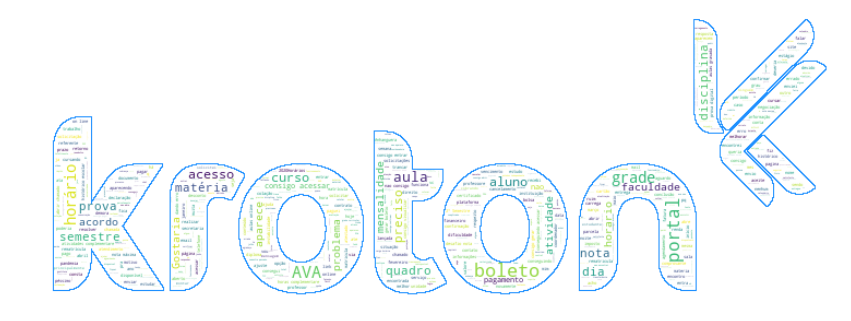

In [20]:
wc1 = WordCloud(width=3000,
                height=2000,
                background_color="white",
                max_words=1000,
                mask=kroton_mask,
                stopwords=stopwords,
                contour_width=0.01,
                contour_color="dodgerblue",
                min_font_size=0.25)

wc1.generate(todos_comentarios)

plt.figure(figsize=[15,10])
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.savefig("output_graficos/wc1.png", format="png")
plt.show()

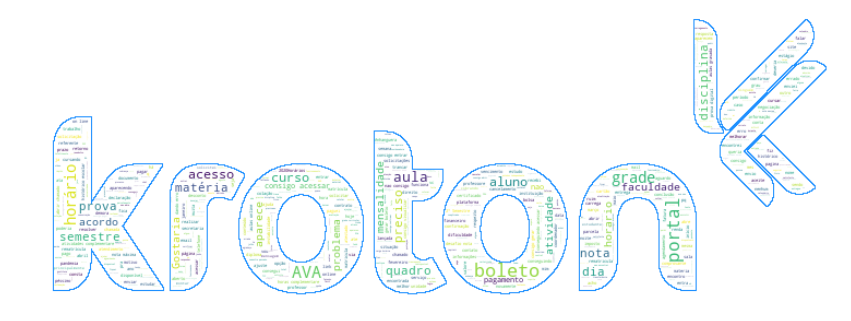

In [21]:
wc2 = WordCloud(width=3000,
                height=2000,
                background_color="white",
                max_words=1000,
                mask=kroton_mask,
                contour_width=0.01,
                contour_color="dodgerblue",
                min_font_size=0.25)

wc2.generate(todos_comentarios)

plt.figure(figsize=[15,10])
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.savefig("output_graficos/wc2.png", format="png")
plt.show()

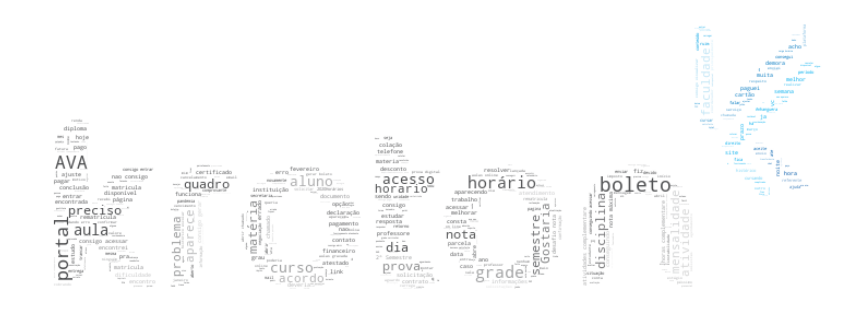

In [22]:
wc3 = WordCloud(width=3000,
                height=2000,
                background_color="white",
                max_words=1000,
                mask=kroton_mask,
                stopwords=stopwords,
                min_font_size=0.25)

wc3.generate(todos_comentarios)

cores_kroton = ImageColorGenerator(kroton_mask)

plt.figure(figsize=[15,10])
plt.imshow(wc3.recolor(color_func=cores_kroton), interpolation="bilinear")
plt.axis("off")
plt.savefig("output_graficos/wc3.png", format="png")
plt.show()

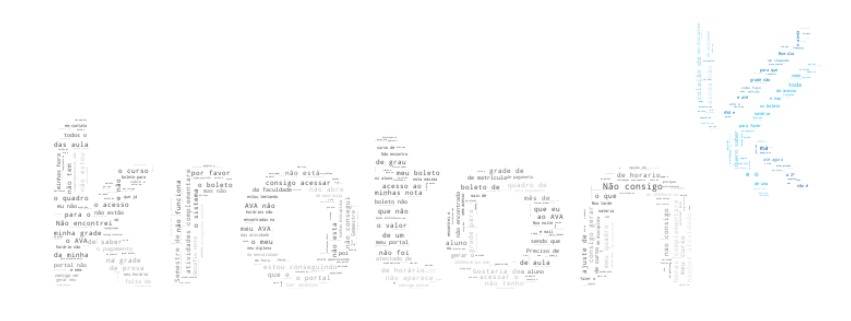

In [23]:
wc4 = WordCloud(width=3000,
                height=2000,
                background_color="white",
                max_words=1000,
                mask=kroton_mask,
                min_font_size=0.25)

wc4.generate(todos_comentarios)

cores_kroton = ImageColorGenerator(kroton_mask)

plt.figure(figsize=[15,10])
plt.imshow(wc4.recolor(color_func=cores_kroton), interpolation="bilinear")
plt.axis("off")
plt.savefig("output_graficos/wc4.png", format="png")
plt.show()

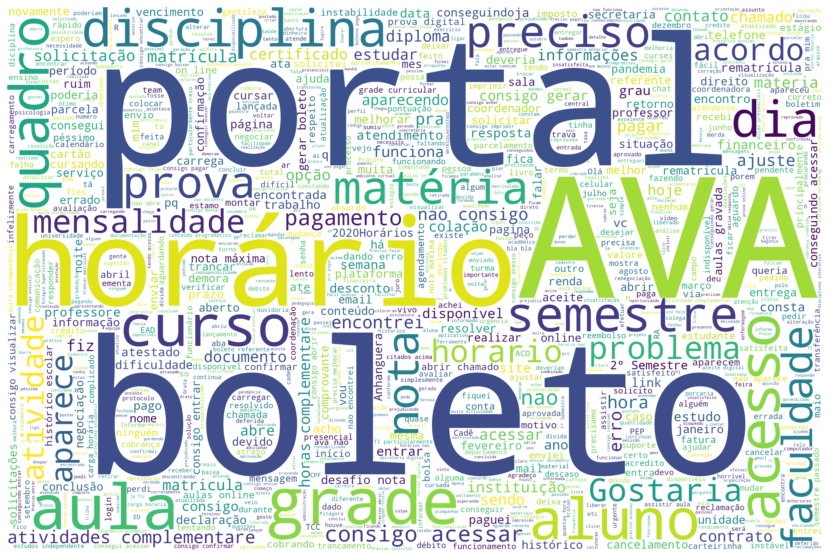

In [24]:
wc5 = WordCloud(width=3000,
                height=2000,
                max_words=1000,
                stopwords=stopwords,
                background_color="white",
                min_font_size=1)

wc5.generate(todos_comentarios)

plt.figure(figsize=[15,10])
plt.imshow(wc5, interpolation="bilinear")
plt.axis("off")
plt.savefig("output_graficos/wc5.png", format="png")
plt.show()

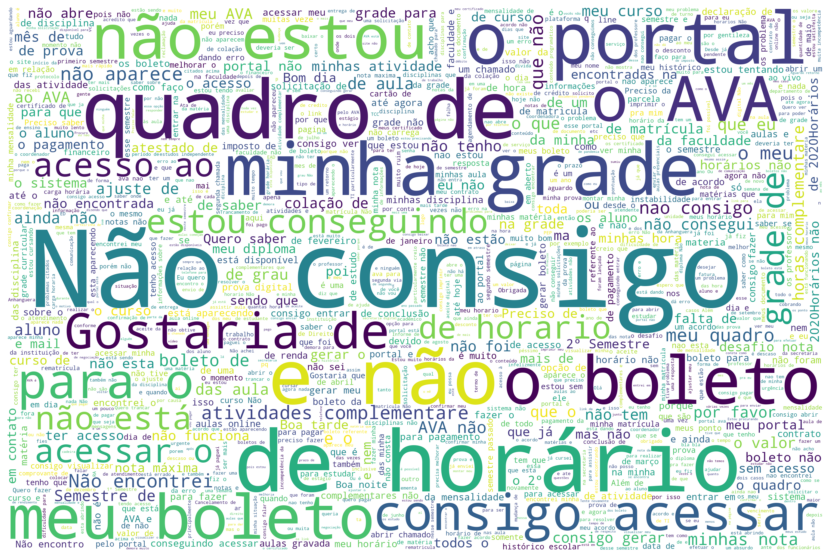

In [25]:
wc6 = WordCloud(width=3000,
                height=2000,
                max_words=1000,
                background_color="white",
                min_font_size=1)


wc6.generate(todos_comentarios)

plt.figure(figsize=[15,10])
plt.imshow(wc6, interpolation="bilinear")
plt.axis("off")
plt.savefig("output_graficos/wc6.png", format="png")
plt.show()

In [26]:
campo1 = "boleto"
campo2 = "ava"
campo3 = "horário"
campo4 = "portal"
campo5 = "acesso"
campo6 = "curso"
campo7 = "grade"
campo8 = "disciplina"
campo9 = "aluno"
campo10 = "nota"

df1 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo1}")]
df2 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo2}")]
df3 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo3}")]
df4 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo4}")]
df5 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo5}")]
df6 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo6}")]
df7 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo7}")]
df8 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo8}")]
df9 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo9}")]
df10 = df_limpo[df_limpo['Descrição'].str.contains(f"{campo10}")]

df1.to_excel(f"output_comentarios/{campo1}.xlsx")
df2.to_excel(f"output_comentarios/{campo2}.xlsx")
df3.to_excel(f"output_comentarios/{campo3}.xlsx")
df4.to_excel(f"output_comentarios/{campo4}.xlsx")
df5.to_excel(f"output_comentarios/{campo5}.xlsx")
df6.to_excel(f"output_comentarios/{campo6}.xlsx")
df7.to_excel(f"output_comentarios/{campo7}.xlsx")
df8.to_excel(f"output_comentarios/{campo8}.xlsx")
df9.to_excel(f"output_comentarios/{campo9}.xlsx")
df10.to_excel(f"output_comentarios/{campo10}.xlsx")

print(f"{campo1}: {len(df1)} comentários.\n")
print(f"{campo2}: {len(df2)} comentários.\n")
print(f"{campo3}: {len(df3)} comentários.\n")
print(f"{campo4}: {len(df4)} comentários.\n")
print(f"{campo5}: {len(df5)} comentários.\n")
print(f"{campo6}: {len(df6)} comentários.\n")
print(f"{campo7}: {len(df7)} comentários.\n")
print(f"{campo8}: {len(df8)} comentários.\n")
print(f"{campo9}: {len(df9)} comentários.\n")
print(f"{campo10}: {len(df10)} comentários.\n")

boleto: 13915 comentários.

ava: 9387 comentários.

horário: 10012 comentários.

portal: 11203 comentários.

acesso: 7553 comentários.

curso: 7037 comentários.

grade: 9755 comentários.

disciplina: 6585 comentários.

aluno: 5898 comentários.

nota: 6999 comentários.



In [27]:
base_total = pd.read_excel("base.xlsx")

In [28]:
base_total.head()

,Descrição,Label
0,"não consegui acessar o AVA, preciso avançar no...",Ava
1,Rematrícula,Matrícula
2,Não consegui pagar o boleto,Boleto
3,telefones de contato,Contato
4,falta de profissionalismo,Prof


In [29]:
base_total_x = base_total["Descrição"]
base_total_y = base_total["Label"]

In [30]:
base_total_x.head()

0    não consegui acessar o AVA, preciso avançar no...
1                                          Rematrícula
2                          Não consegui pagar o boleto
3                                 telefones de contato
4                            falta de profissionalismo
Name: Descrição, dtype: object

In [31]:
base_total_y.head()

0          Ava
1    Matrícula
2       Boleto
3      Contato
4         Prof
Name: Label, dtype: object

In [32]:
if len(base_total_x) == len(base_total_y):
    print("Tudo perfeito!")
else:
    print("Formato errado")

Tudo perfeito!


In [33]:
X_train, X_test, y_train, y_test = train_test_split(base_total_x,
                                                    base_total_y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
text_clf = Pipeline([("tfidf", TfidfVectorizer()),("clf", LinearSVC())])

In [35]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [36]:
predictions = text_clf.predict(X_test)

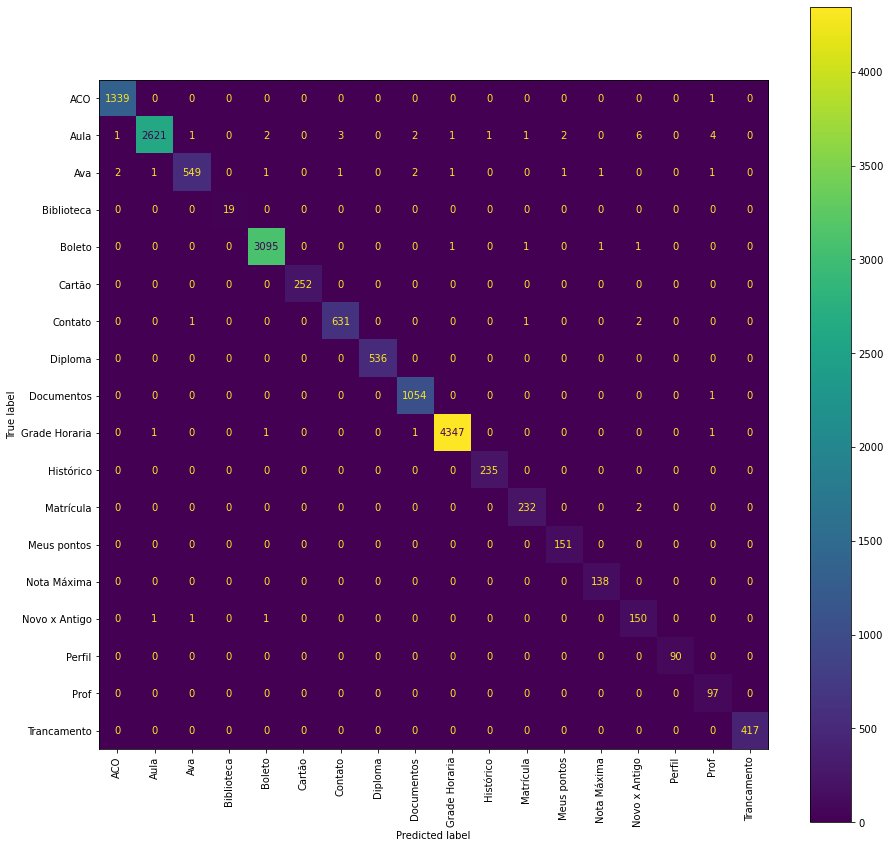

In [37]:
fig, ax = plt.subplots(figsize=(15, 15))
metrics.plot_confusion_matrix(text_clf, y_test, predictions, xticks_rotation="vertical", ax=ax)
fig.savefig("Matriz_final.png")

In [38]:
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

          ACO       1.00      1.00      1.00      1342
         Aula       0.99      1.00      0.99      2624
          Ava       0.98      0.99      0.99       552
   Biblioteca       1.00      1.00      1.00        19
       Boleto       1.00      1.00      1.00      3100
       Cartão       1.00      1.00      1.00       252
      Contato       0.99      0.99      0.99       635
      Diploma       1.00      1.00      1.00       536
   Documentos       1.00      1.00      1.00      1059
Grade Horaria       1.00      1.00      1.00      4350
    Histórico       1.00      1.00      1.00       236
    Matrícula       0.99      0.99      0.99       235
  Meus pontos       1.00      0.98      0.99       154
  Nota Máxima       1.00      0.99      0.99       140
Novo x Antigo       0.98      0.93      0.96       161
       Perfil       1.00      1.00      1.00        90
         Prof       1.00      0.92      0.96       105
  Trancam

In [39]:
metrics.accuracy_score(y_test, predictions)

0.9966264759167864

In [40]:
scores = cross_val_score(text_clf, y_test, predictions, cv=10)

In [41]:
scores

array([0.99625234, 0.99687695, 0.99562773, 0.99687695, 0.99875078,
       0.99562773, 0.99562773, 0.995     , 0.998125  , 0.9975    ])

In [55]:
text_clf.predict([""])

array(['Ava'], dtype=object)

In [43]:
pickle.dump(text_clf, open("modelo_final.pkl", 'wb'))

In [44]:
base_previsao = pd.read_excel("base_vitao.xlsx")

In [45]:
base_previsao = base_previsao["Descrição"]

In [46]:
base_previsao

0                                           Abrir chamado
1                                            Minhas notas
2                                        Plano de estudos
3                                              Reprovadas
4       Falta atualizar 5 matérias aprovadas neste sem...
                              ...                        
3218                             Segunda chamada de prova
3219    eu  nao conseguí emtrar a mi ava para fazer as...
3220    Não encontrei meus pontos, estou lutando para ...
3221                 As notas não aparecem mais no portal
3222                                  Boleto não consegui
Name: Descrição, Length: 3223, dtype: object

In [47]:
previsao_vi = text_clf.predict(base_previsao)

In [48]:
previsao_vi

array(['Ava', 'Aula', 'Aula', ..., 'Meus pontos', 'Aula', 'Boleto'],
      dtype=object)

In [49]:
previsao_vi_df = pd.DataFrame(previsao_vi)

In [50]:
previsoes_finais = pd.concat([base_previsao, previsao_vi_df], axis=1)

In [51]:
previsoes_finais

,Descrição,0
0,Abrir chamado,Ava
1,Minhas notas,Aula
2,Plano de estudos,Aula
3,Reprovadas,Aula
4,Falta atualizar 5 matérias aprovadas neste sem...,Aula
...,...,...
3218,Segunda chamada de prova,Prof
3219,eu nao conseguí emtrar a mi ava para fazer as...,Ava
3220,"Não encontrei meus pontos, estou lutando para ...",Meus pontos
3221,As notas não aparecem mais no portal,Aula


In [52]:
previsoes_finais.to_excel("resultados_vi.xlsx") 